In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#### Load Dataset

The given dataset contains two files:
- train_data.csv
- test_data.csv

So, We don't need to split the dataset

In [2]:
df_train = pd.read_csv("data/train_data.csv")
df_test = pd.read_csv("data/test_data.csv")

In [3]:
# Adding column names
df_train.columns = ["review", "target"]
df_test.columns = ["review", "target"]

#### Exploratory Data Analysis (EDA)

Performing EDA on the training data

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  25000 non-null  object
 1   target  25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


In [5]:
# Statistical summary
df_train.describe()

,target
count,25000.00000
mean,0.50000
std,0.50001
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [6]:
# First 5 rows
df_train.head(5)

,review,target
0,"This film is absolutely awful, but nevertheles...",0
1,Well since seeing part's 1 through 3 I can hon...,0
2,I got to see this film at a preview and was da...,1
3,This adaptation positively butchers a classic ...,0
4,Råzone is an awful movie! It is so simple. It ...,0


In [7]:
# Value counts (0 for negative and 1 for positive)
df_train["target"].value_counts()

target
0    12500
1    12500
Name: count, dtype: int64

#### Data Visualization

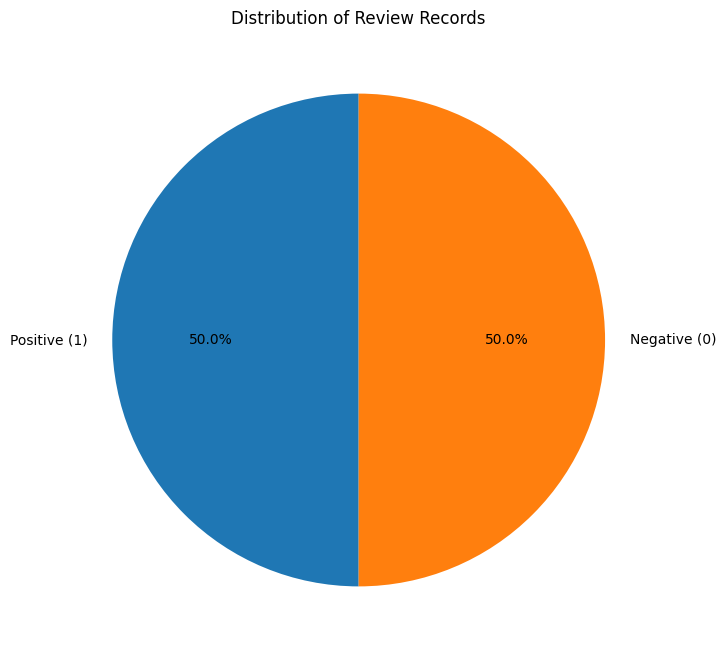

In [8]:
# Create a pie chart

labels = ["Positive (1)", "Negative (0)"]
sizes = [df_train["target"].value_counts()[0], df_train["target"].value_counts()[0]]

plt.figure(figsize = (10, 8))
plt.pie(sizes, labels = labels, autopct = "%1.1f%%", startangle = 90)
plt.title("Distribution of Review Records")
plt.show()


#### Basic Data Cleaning

In [9]:
# checking any missing values
df_train.isnull().sum()

review    0
target    0
dtype: int64

In [10]:
# Check for duplicates
df_train.duplicated().sum()

np.int64(96)

In [11]:
# Remove duplicates
df_train.drop_duplicates(inplace=True)

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24904 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  24904 non-null  object
 1   target  24904 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 583.7+ KB


#### Text Preprocessing
- Remove HTML tags, punctuation, and numbers
- Convert to lowercase
- Remove Stopwords

In [ ]:
import re
import string
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")

list_stopwords = set(stopwords.words("english")) # set use to get better performance

# Define a text_cleaning function to perform all text_preprocessing
def text_cleaning(text : str):
    # remove html
    text = re.sub(re.compile("<.*?>"), '', text)
    
    # remove punctuation
    text = text.translate(str.maketrans("","",string.punctuation))
    
    # remove numbers
    text = re.sub(r'\d+','',text)
    
    # lowercase
    text = text.lower()
    
    # remove stopwatch
    text = " ".join([word for word in text.split() if word not in list_stopwords])
        
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\BOSS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# applying the text_cleaning function to the dataset
df_train["review"] = df_train["review"].apply(text_cleaning)

In [15]:
df_train["review"][0]

'film absolutely awful nevertheless hilarious times although humor entirely unintentionalthe plot beyond ridiculous dont even think yearold would convinced ludicrous idiocy filmmakers tried slap together story however positive side horrifically inane plot twists provide great deal humor example wow lady hogbottom giant missile hidden back yard gets worse even funnier ill spare youthe acting generally laughable kids roles sort cute believable hand annie pretty awful allaround adults dont take roles seriously largely good thing theyd tried believable film wouldve even worse difficult imagineonce get past overall crappiness movie actually standout moments almostnotcrappiness scene lady hogbottoms son runs away maid surprisingly hilarious though annoying letdown get caught police butler character minor ray sunlight almost never quite pierces gloomwatching movie actually caused physical pain nevertheless redeeming parts made almost watchable without beginning hemorrhage internally judged go

#### Applying All cleaning and text preprocessing steps for test_data.csv

In [16]:
# remove duplicates
df_test.drop_duplicates(inplace=True)
# apply text_cleaning 
df_test["review"] = df_test["review"].apply(text_cleaning)

#### Split the dataset
- Since the Dataset contains two csv files (test and train),We don't need to split it in an 80:20 ratio.

In [17]:
# For training
X_train = df_train["review"]
y_train = df_train["target"]

# For testing
X_test = df_test["review"]
y_test = df_test["target"]

In [ ]:
# checking the shape of the training data
X_train.shape, y_train.shape

((24904,), (24904,))

#### Feature Engineering
Converting raw text into numerical features

In [20]:
## Applying TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer()

In [21]:
X_train_tf_idf = tf_idf.fit_transform(X_train)
X_test_tf_idf = tf_idf.transform(X_test)

### Model Building

In [22]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

##### Training
For training purposes, I use 3 different types of models to check which one performs better. Based on performance, I will select the best one and try to optimize it further.
- MultinomialNB
- LogisticRegression
- RandomForestClassifier

In [ ]:
# Training
models = {
    "MultinomialNB" : MultinomialNB(),
    "LogisticRegression" : LogisticRegression(),
    "RandomForest" : RandomForestClassifier()
}

# define a function to train model
def fit_and_score(models, x_train,y_train,x_test,y_test):

    results = {}

    for model_name, model in models.items():
        model.fit(x_train,y_train)
                
        results[model_name] = model.score(x_test,y_test)
        
    return results


In [ ]:
# Start model training
model_scores = fit_and_score(
    models = models,
    x_train = X_train_tf_idf,
    y_train = y_train,
    x_test = X_test_tf_idf,
    y_test = y_test
)

In [25]:
model_scores

{'MultinomialNB': 0.8363372444659489,
 'LogisticRegression': 0.8820612072093867,
 'RandomForest': 0.8452481754767953}

<Axes: >

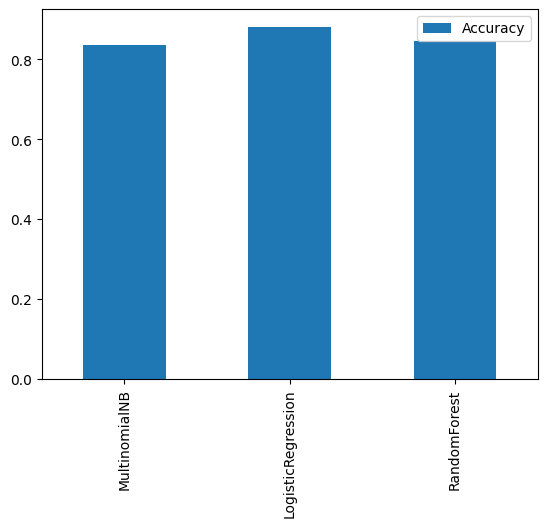

In [ ]:
# Model score compare
model_compare = pd.DataFrame(model_scores,index = ["Accuracy"])
model_compare.T.plot.bar()

#### Optimization
Let's perform hyperparameter tuning on LogisticRegression

In [27]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# model
model = LogisticRegression(max_iter=2000)

# Define params
param_grid = {
    'C': [0.01, 0.1, 1, 10],       
    'penalty': ['l2'],             
    'solver': ['liblinear', 'saga'], 
    'max_iter': [1000, 2000]       
}

In [ ]:
# applying params
gs_model = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv = 5,
    n_jobs=-1,
    verbose=True
)
# Start training
gs_model.fit(X_train_tf_idf,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


,estimator,LogisticRegre...max_iter=2000)
,param_grid,"{'C': [0.01, 0.1, ...], 'max_iter': [1000, 2000], 'penalty': ['l2'], 'solver': ['liblinear', 'saga']}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [ ]:
# check best params
gs_model.best_params_

{'C': 10, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'saga'}

In [ ]:
gs_model.best_score_

np.float64(0.892306523826686)

### Evaluation
- Confusion Matrix
- Classification Report
- F1-Score
- Precision
- Recall

In [33]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report

In [34]:
# make prediction
y_preds = gs_model.predict(X_test_tf_idf)

In [35]:
y_preds

array([0, 0, 0, ..., 1, 1, 1], shape=(24801,))

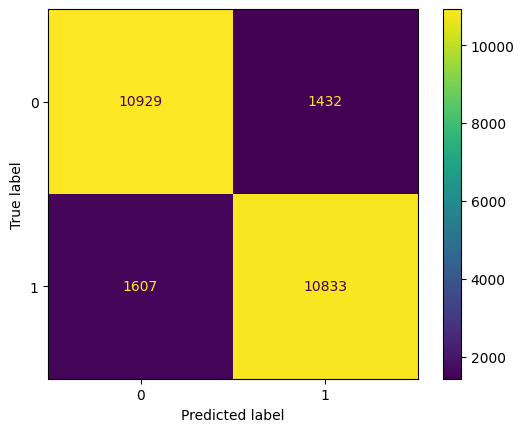

In [37]:
# Confusion Matrix

cm = confusion_matrix(y_test, y_preds)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()

In [38]:
# Classification Report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88     12361
           1       0.88      0.87      0.88     12440

    accuracy                           0.88     24801
   macro avg       0.88      0.88      0.88     24801
weighted avg       0.88      0.88      0.88     24801



### Save model

In [39]:
import pickle

pickle.dump(tf_idf, open("model/vectorizer.pkl",'wb'))
pickle.dump(gs_model, open("model/model.pkl","wb"))